# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [3]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [54]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [55]:
from IPython.lib.display import YouTubeVideo
from sklearn.metrics import mean_squared_error
import numpy as np

class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        diff = (X.dot(w) - y) ** 2
        return diff.mean()
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        res_for_mean = X.transpose() * (X.dot(w) - y) * 2
        return res_for_mean.mean(axis = 1)

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [56]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [57]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    result = []
    result.append(w_init)
    for i in range(n_iterations):
      new_w = w_init - lr * loss.calc_grad(X, y, w_init)
      result.append(new_w)
      w_init = new_w
    return result



Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [58]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [59]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [60]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

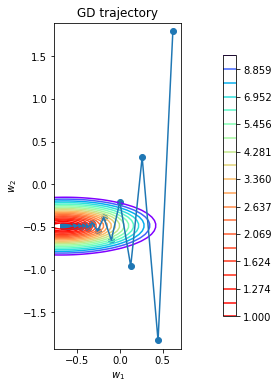

In [61]:
loss = MSELoss()
w_list_1 =gradient_descent(w_init, X, y, loss, 0.01, 100)
plot_gd(w_list_1, X, y, loss)

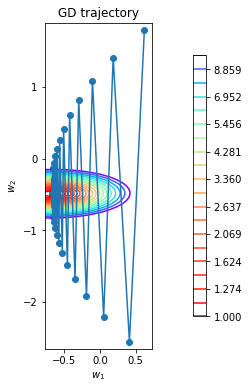

In [62]:
loss = MSELoss()
w_list_2 =gradient_descent(w_init, X, y, loss, 0.012, 100)
plot_gd(w_list_2, X, y, loss)

Изменение параметра lr на 0,002 сильно меняет траекторию градиентного спуска в худшую сторону, его начинает колбасить

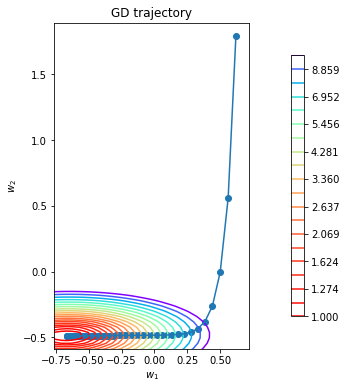

In [63]:
loss = MSELoss()
w_list_3 =gradient_descent(w_init, X, y, loss, 0.0034, 100)
plot_gd(w_list_3, X, y, loss)

Сделав параметр на порядок меньше картинка стала гораздо лучше, мы почти красиво спускаемся к глобальному минимуму

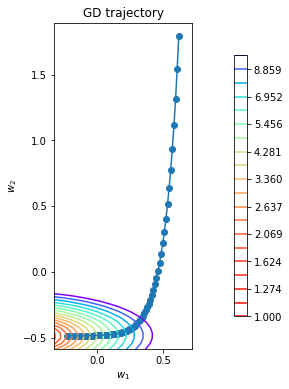

In [64]:
loss = MSELoss()
w_list_4 =gradient_descent(w_init, X, y, loss, 0.0007, 100)
plot_gd(w_list_4, X, y, loss)

Уменьшив lr еще сильнее график спуск становится более гладким, что очевидно, так как уменьшается длина шага, но теперь мы не дошли до нужной точки, там видно, что мы остановились в какой-то момент.

Таким образом, мы видим, что параметр lr, без изменения прочих, сильно влияет на траекторию градиентного спуска, даже незначительное изменение lr может оказать влияние. Наиболее оптимальный вариант из представленных lr = 0.0034.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [65]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w_init_list = []
    w_init_list.append(w_init)
    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      result_stoch = lr * loss.calc_grad(batch, y[batch_indices], w_init_list[i])
      new_w = np.subtract(w_init_list[i], result_stoch)
      w_init_list.append(new_w)
    return w_init_list

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

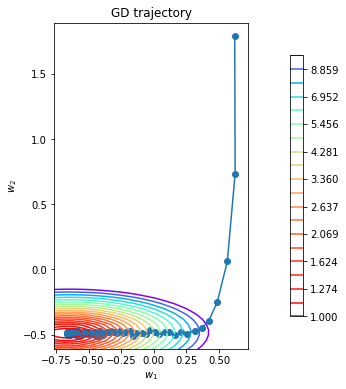

In [66]:
# -- YOUR CODE HERE --
loss = MSELoss()
w_list_1_1 = stochastic_gradient_descent(w_init, X, y, loss, 0.0034, 50 ,100)
plot_gd(w_list_1_1, X, y, loss)

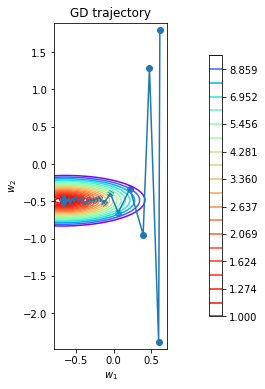

In [67]:
loss = MSELoss()
w_list_1_2 = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 50 ,100)
plot_gd(w_list_1_2, X, y, loss)

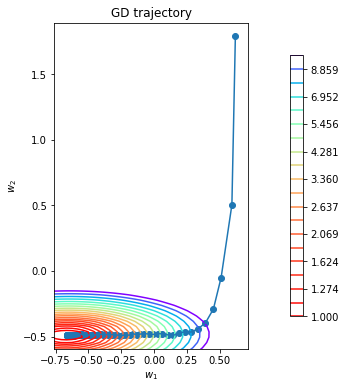

In [68]:
loss = MSELoss()
w_list_1_3 = stochastic_gradient_descent(w_init, X, y, loss, 0.0034, 200 ,100)
plot_gd(w_list_1_3, X, y, loss)

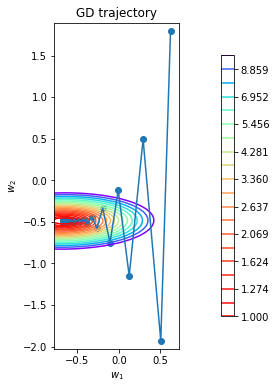

In [19]:
loss = MSELoss()
w_list_1_4 = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 200 ,100)
plot_gd(w_list_1_4, X, y, loss)

В приведенных выше примерах при lr = 0.01 и lr = 0.0007 разные batch_size, чтобы сравнить влияние обоих параметров. При одинаковом lr, но разных batch_size траектория изменилась не сильно, нас стало чуть меньше колбасить в конце при бОльшем значении размера подвыборки.
При этом lr все еще сильно влияет на градиентный спуск, чем он меньше, тем более равномерный спуск.

Данный вариант лучше обычного градиентного спуска, так как мы быстрее достигаем оптимального значения

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [69]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w_init_list_2 = []
    w_init_list_2.append(w_init)
    lr_i = []
    lr_i.append(lr)
    for i in range(n_iterations):
      batch_indices_2 = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch_2 = X[batch_indices_2]
      lr_2 = lr_i[i] * ((1 / (1 + i)) ** p)
      result_stoch_2 = lr_2 * loss.calc_grad(batch_2, y[batch_indices_2], w_init_list_2[i])
      new_w_2 = np.subtract(w_init_list_2[i], result_stoch_2)
      w_init_list_2.append(new_w_2)
      lr_i.append(lr_2)
    return w_init_list_2

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

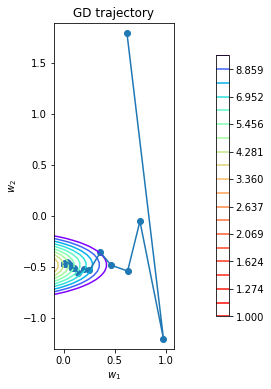

In [70]:
# -- YOUR CODE HERE --
loss = MSELoss()
w_list_1_1_1 = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.1, 100)
plot_gd(w_list_1_1_1, X, y, loss)

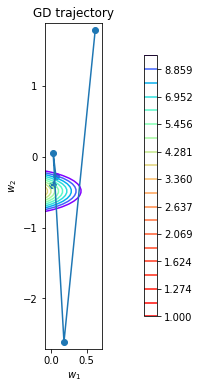

In [71]:
loss = MSELoss()
w_list_1_1_2 = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.5, 100)
plot_gd(w_list_1_1_2, X, y, loss)

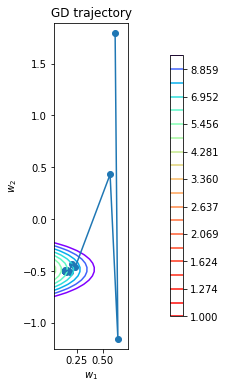

In [72]:
loss = MSELoss()
w_list_1_1_3 = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.3, 100)
plot_gd(w_list_1_1_3, X, y, loss)

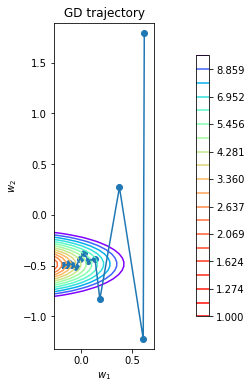

In [73]:
loss = MSELoss()
w_list_1_1_4 = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.1125, 100)
plot_gd(w_list_1_1_4, X, y, loss)

Чем меньше параметр p, тем ближе мы спускаемся к глобальному минимуму, при этом изменение на сотые параметра оказывает сильное влияние на траекторию градиентного спуска.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

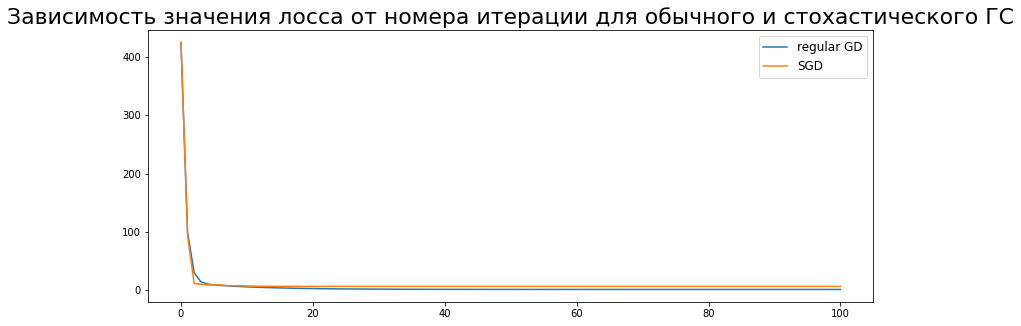

In [80]:
# -- YOUR CODE HERE --
w_list_for_regular = gradient_descent(w_init, X, y, loss, 0.0034, 100)

y_for_regular = []
for i in range(len(w_list_for_regular)):
  y_for_regular.append(loss.calc_loss(X, y, w_list_for_regular[i]))


w_list_for_stoch = stochastic_gradient_descent(w_init, X, y, loss, 0.0034, 10, 0.1, 100)

y_for_stoch = []
for i in range(len(w_list_for_stoch)):
  y_for_stoch.append(loss.calc_loss(X, y, w_list_for_stoch[i]))

  
plt.figure(figsize=(13, 5))
plt.plot(range(101), y_for_regular, label = 'regular GD')
plt.plot(range(101), y_for_stoch, label = 'SGD')
plt.title("Зависимость значения лосса от номера итерации для обычного и стохастического ГС", fontsize=22)
plt.legend(fontsize=12) 



Видно небольшое преимущество на ранних итерациях, быстрее соккращается значение лосса, что може происходить благодаря тому, что в стохастическом градиентном спуске мы используем не всю выборку, а ее часть (подвыборку).

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [26]:
# В курсе на открытом образовании проблему инициализации весов решили заполнением их нулями
from sklearn.linear_model import LinearRegression
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w = np.random.uniform(-100, 100, X.shape[1])
        grad = gradient_descent(w, X, y, self.loss, lr)
        self.w = grad[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        product = np.dot(X, self.w)
        return product

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [27]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [28]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [29]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
X_raw.head()

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [30]:
y.isnull().any()


False

In [31]:
X_raw.columns = ['A' + str(i) for i in range(1, 26)] + ['class'] #для удобства назовем столбцы А1...А26
X_raw.isnull().any() # вау, есть пропуски, надо заполнить

A1       False
A2       False
A3        True
A4       False
A5       False
A6       False
A7        True
A8       False
A9       False
A10      False
A11      False
A12      False
A13      False
A14      False
A15      False
A16      False
A17      False
A18      False
A19      False
A20       True
A21       True
A22      False
A23       True
A24       True
A25      False
class    False
dtype: bool

In [32]:
X_raw.dtypes

A1         int64
A2         int64
A3       float64
A4        object
A5        object
A6        object
A7        object
A8        object
A9        object
A10       object
A11      float64
A12      float64
A13      float64
A14      float64
A15        int64
A16       object
A17       object
A18        int64
A19       object
A20      float64
A21      float64
A22      float64
A23      float64
A24      float64
A25        int64
class      int64
dtype: object

In [33]:
# для категориальных признаков (А7) заменим пропуски на наиболее часто встречающееся значение
X_raw['A7'].value_counts() # наиболее часто встречается 'four'
X_raw = X_raw.fillna({'A7': 'four'})

In [34]:
#закодируеми категориальные признаки (А4-А10, А16, А17, А19)
X_raw = X_raw.replace({'A7': {'four': 4, 'two': 2},
                       'A17': {'four': 4, 'six': 6, 'five': 5, 'eight': 8,
                               'two': 2, 'twelve': 12, 'three':3 },
                       'A5': {'gas': 0, 'diesel': 1},
                       'A6': {'std': 0, 'turbo': 1},
                       'A10': {'front': 0, 'rear': 1}})
# так как в столбце А9 хранится инфа о приводности авто содержит три признака, не является порядковым или бинарным признаком закодируем его методом one-hot (аналогично для остальных признаков)
X_raw = pd.get_dummies(X_raw, columns=['A4'])
X_raw = pd.get_dummies(X_raw, columns=['A8'])
X_raw = pd.get_dummies(X_raw, columns=['A16'])
X_raw = pd.get_dummies(X_raw, columns=['A19'])
X_raw = pd.get_dummies(X_raw, columns=['A9'])

In [35]:
X_raw = X_raw.fillna(X_raw.mean())

In [36]:
X_raw.isnull().any().any() # проверим, что все ок

False

In [37]:
# И разобьем наконец-то на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=5) 

In [38]:
from sklearn import preprocessing
normalizer = preprocessing.MinMaxScaler()
normalizer_fitted_train = normalizer.fit(X_train)
X_train_1 = normalizer_fitted_train.transform(X_train)  
X_test_1 = normalizer_fitted_train.transform(X_test) 

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [39]:
loss = MSELoss()
lr = 0.0034
Lin_Reg_fit = linear_regression.fit(X_train_1, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [40]:
from sklearn.metrics import mean_squared_error
predict_train = mean_squared_error(y_train,linear_regression.predict(X_train_1))
predict_test = mean_squared_error(y_test, Lin_Reg_fit.predict(X_test_1))

In [41]:
print(predict_train, predict_test)

2334388.8822224326 7628244.926003378


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [42]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        fisrt_comp = (np.square(X.dot(w) - y)).mean()
        sec_comp = self.coef * np.square(np.linalg.norm(w[:-1]))
        return fisrt_comp + sec_comp
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        first_comp_1 = 2 * ((X.transpose() * (X.dot(w) - y)).mean())
        sec_comp_1 = 2 * self.coef * np.array(list(w)[:-1]+[0])
        return first_comp_1 + sec_comp_1


Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [43]:
linear_regression_1 = LinearRegression(MSEL2Loss(0.00001), lr)

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [44]:
# -- YOUR CODE HERE --
Lin_Reg_fit = linear_regression_1.fit(X_train_1, y_train)
predict_train_1 = mean_squared_error(y_train,linear_regression_1.predict(X_train_1))
predict_test_1 = mean_squared_error(y_test, linear_regression_1.predict(X_test_1))
print(predict_train_1, predict_test_1)

49118480.538309656 44996335.62788699


По трейну ошибка стала больше, но при этом по тесту вроооде меньше, попробую объяснить причину. В прошлый раз модель переобучилась, регуляризация же позволяет уменьшить сложность модели, что помогает справиться с этой проблемой, поэтому ошибка на тесте становится меньше, чем в прошлый раз. Вроде как это еще называется штрафом за большие веса (помню что-то из лекции, но я слишком устала, чтобы открывать конспект, соре, если написала здесь какую-то чушь)

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [51]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        sum_for_fi = 0
        for i in range(X.shape[0]):
          z = int(np.dot(X[i, :], w) - y[i])
          if abs(z) < self.eps:
            func_fi = 0.5 * (z ** 2)
          else: 
            func_fi = self.eps * (abs.z - 0.5 * self.eps)
          sum_for_fi += func_fi
        loss = sum_for_fi.mean()
        return loss

        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните егo
        sum_for_fi_1 = 0
        for i in range(X.shape[0]):
          z = int(np.dot(X[i, :], w) - y[i])
          if abs(z) < self.eps:
            func_fi_1 = z
          else:
            func_fi_1 = self.eps * np.sign(z)
          sum_for_fi_1 += func_fi_1
          sum_for_fi_1 += X[i]
        loss_1 = sum_for_fi_1.mean()
        return loss_1

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [52]:
# -- YOUR CODE HERE --
lr = 0.0034
linear_regression_hub = LinearRegression(HuberLoss(0.1), lr)
Lin_Reg_fit = linear_regression_hub.fit(X_train_1, y_train)
predict_train_2 = mean_squared_error(y_train,linear_regression_hub.predict(X_train_1))
predict_test_2 = mean_squared_error(y_test, linear_regression_hub.predict(X_test_1))
print(predict_train_2, predict_test_2)

7298280145.702192 6454484567.591486


Тут я не понимаю, почему ошибка стала больше, возможно где-то выше была ошибка в коде

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [ ]:
# скинула в личку ассисту, мем был душевный и актуальный

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
# -- YOUR CODE HERE --